# **FASE 2: DATA ACQUISITION**

In [3]:
# Install Ultralytics
!pip install ultralytics

# Download Construction-PPE Dataset
from ultralytics import YOLO
from ultralytics.data.utils import download

# Dataset akan otomatis didownload saat training pertama kali
# Atau manual download:
!yolo task=detect mode=train data=construction-ppe.yaml epochs=1 imgsz=640

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 24.7 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.229 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=construction-ppe.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=1, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h

In [1]:
from google.colab import drive
drive.mount('/content/drive')

# Create project folder
!mkdir -p /content/drive/MyDrive/PPE_Detection_Project

Mounted at /content/drive


In [ ]:
import yaml
import os

# Define the path to the dataset configuration file saved by Ultralytics after training
# Ultralytics saves the training arguments, including dataset info, in args.yaml within the run directory.
yaml_path = '/content/runs/detect/train/args.yaml'

# Check if the YAML file exists before trying to open it
if os.path.exists(yaml_path):
    with open(yaml_path, 'r') as f:
        data_info = yaml.safe_load(f)
    print("Dataset Configuration (from args.yaml used in training):")
    print(data_info)
else:
    print(f"Error: Dataset configuration file not found at {yaml_path}")
    print("Please ensure the training run completed and 'args.yaml' is in the expected location.")

Dataset Configuration (from args.yaml used in training):
{'task': 'detect', 'mode': 'train', 'model': 'yolo11n.pt', 'data': 'construction-ppe.yaml', 'epochs': 1, 'time': None, 'patience': 100, 'batch': 16, 'imgsz': 640, 'save': True, 'save_period': -1, 'cache': False, 'device': None, 'workers': 8, 'project': None, 'name': 'train', 'exist_ok': False, 'pretrained': True, 'optimizer': 'auto', 'verbose': True, 'seed': 0, 'deterministic': True, 'single_cls': False, 'rect': False, 'cos_lr': False, 'close_mosaic': 10, 'resume': False, 'amp': True, 'fraction': 1.0, 'profile': False, 'freeze': None, 'multi_scale': False, 'compile': False, 'overlap_mask': True, 'mask_ratio': 4, 'dropout': 0.0, 'val': True, 'split': 'val', 'save_json': False, 'conf': None, 'iou': 0.7, 'max_det': 300, 'half': False, 'dnn': False, 'plots': True, 'source': None, 'vid_stride': 1, 'stream_buffer': False, 'visualize': False, 'augment': False, 'agnostic_nms': False, 'classes': None, 'retina_masks': False, 'embed': None,

# **FASE 3: DATA EXPLORATION**

❌ Tidak ditemukan gambar dalam folder: /content/datasets/construction-ppe/train/images


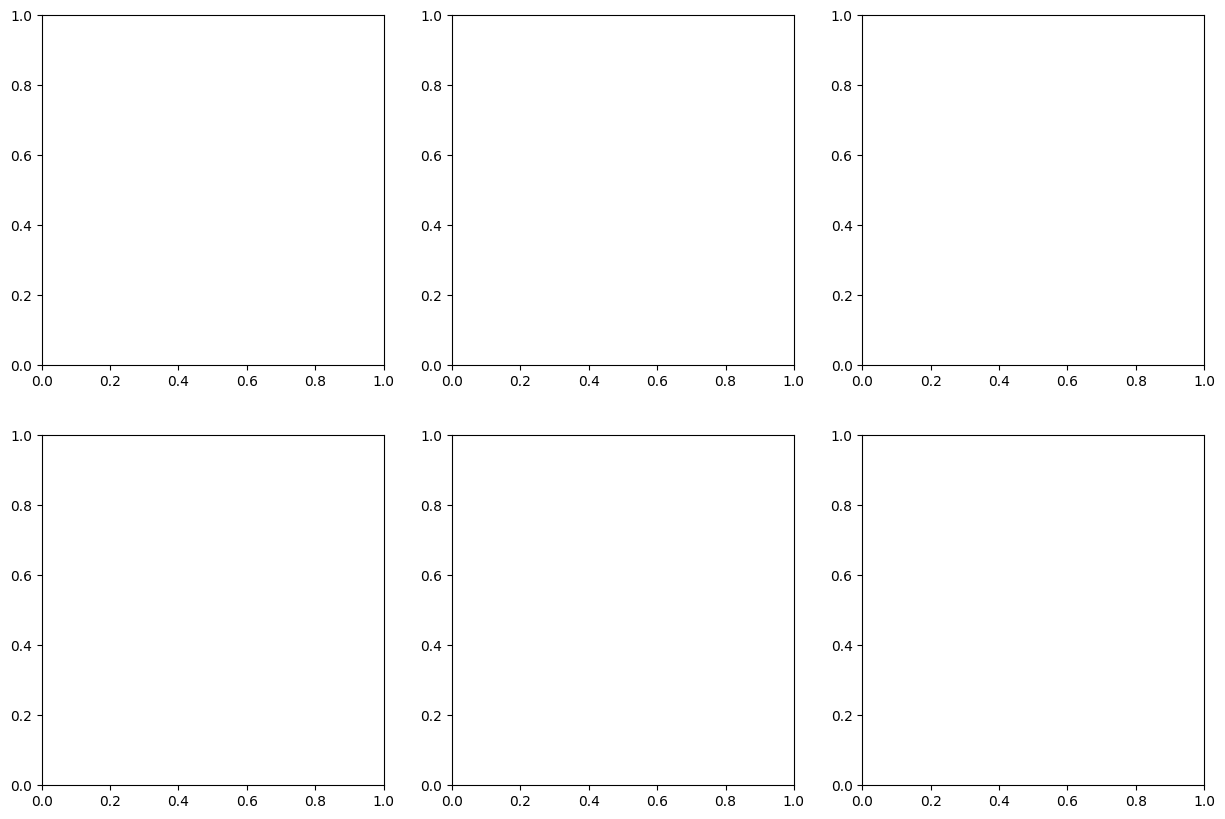

In [ ]:
import matplotlib.pyplot as plt
import cv2
from pathlib import Path

def visualize_samples(data_path, num_samples=6):
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))

    # Correct image folder
    img_dir = Path(data_path) / 'train' / 'images'

    # Collect all image types
    images = []
    for ext in ['*.jpg', '*.jpeg', '*.png', '*.JPG', '*.PNG']:
        images.extend(list(img_dir.glob(ext)))

    images = images[:num_samples]

    if len(images) == 0:
        print("❌ Tidak ditemukan gambar dalam folder:", img_dir)
        return

    for idx, img_path in enumerate(images):
        row = idx // 3
        col = idx % 3

        img = cv2.imread(str(img_path))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        axes[row][col].imshow(img)
        axes[row][col].set_title(f'Sample {idx+1}')
        axes[row][col].axis('off')

    plt.tight_layout()
    plt.show()

# Run
visualize_samples('/content/datasets/construction-ppe')

Kelas yang akan dideteksi:
0: helmet
1: gloves
2: vest
3: boots
4: goggles
5: none
6: Person
7: no_helmet
8: no_goggle
9: no_gloves
10: no_boots

--- Listing contents of /content/datasets/construction-ppe/ ---
/content/datasets/construction-ppe/:
data.yaml  images  labels  LICENSE

/content/datasets/construction-ppe/images:
test  train  val

/content/datasets/construction-ppe/images/test:
image1003.jpg	image1235.jpg  image225.jpg   image533.jpg   image787.jpg
image1007.jpg	image1239.jpg  image231.jpg   image535.jpg   image796.jpg
image1009.jpg	image1252.jpg  image241.jpg   image536.jpg   image805.jpg
image1014.jpg	image1256.jpg  image257.jpg   image537.jpg   image810.jpg
image1019.jpg	image1264.jpg  image271.jpg   image538.jpg   image825.jpg
image1023.jpg	image1270.jpg  image287.jpg   image541.jpg   image834.jpg
image1037.jpeg	image1276.jpg  image296.jpg   image548.jpg   image846.jpg
image1065.jpg	image1292.jpg  image324.jpg   image550.jpg   image860.jpg
image1074.jpg	image1293.jpg  im

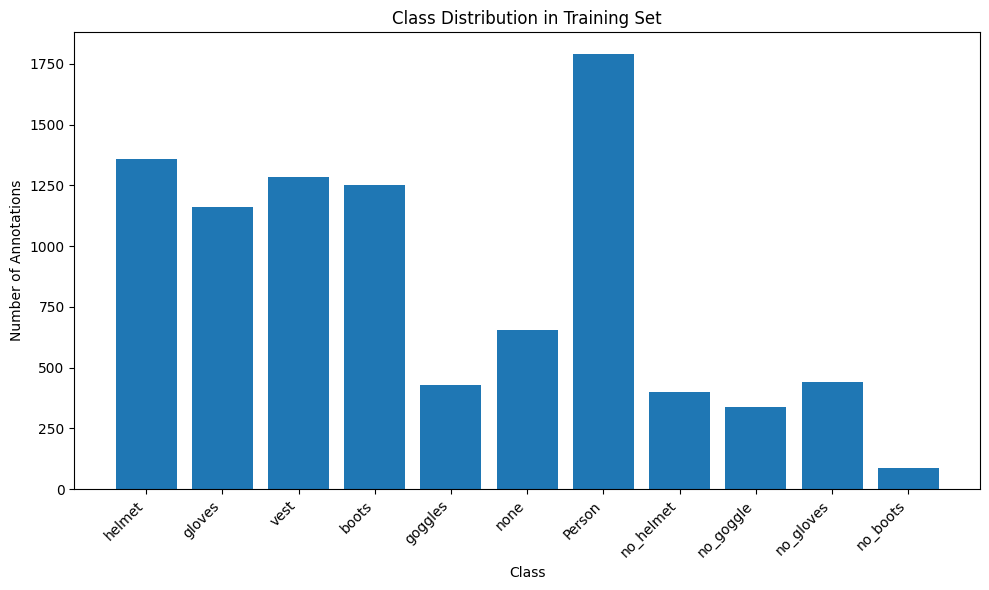

In [ ]:
import matplotlib.pyplot as plt
import cv2
import os
from pathlib import Path
from collections import Counter

# Manually define the data_config with class names as observed from the training logs.
# The 'construction-ppe.yaml' file was not directly accessible despite being used by Ultralytics.
data_config = {
    'names': [
        'helmet', 'gloves', 'vest', 'boots', 'goggles', 'none', 'Person',
        'no_helmet', 'no_goggle', 'no_gloves', 'no_boots'
    ]
}

print("Kelas yang akan dideteksi:")
for idx, class_name in enumerate(data_config['names']):
    print(f"{idx}: {class_name}")

# Count annotations per class
def count_annotations(label_dir):
    class_counts = Counter()

    # Ensure label_dir exists before proceeding
    if not Path(label_dir).exists():
        print(f"Warning: Label directory not found: {label_dir}")
        return class_counts

    for label_file in Path(label_dir).glob('*.txt'):
        with open(label_file, 'r') as f:
            for line in f:
                parts = line.strip().split()
                if parts:
                    try:
                        class_id = int(parts[0])
                        class_counts[class_id] += 1
                    except ValueError:
                        print(f"Warning: Could not parse class_id from line '{line.strip()}' in {label_file}")

    return class_counts

# Visualize class distribution
# The label directory path is incorrect, let's list the directory contents to find the correct path
print("\n--- Listing contents of /content/datasets/construction-ppe/ ---")
!ls -R /content/datasets/construction-ppe/
print("-----------------------------------------------------------")

# Now with the correct path, uncomment and use it
label_dir = '/content/datasets/construction-ppe/labels/train'
class_counts = count_annotations(label_dir)

# Prepare data for plotting, ensuring all class IDs found in annotations are mapped to names
plot_labels = []
plot_values = []

# Sort by class ID to ensure consistent order in the plot
for class_id in sorted(class_counts.keys()):
    if class_id < len(data_config['names']):
        plot_labels.append(data_config['names'][class_id])
        plot_values.append(class_counts[class_id])
    else:
        print(f"Warning: Annotation found for unknown class ID: {class_id}")


plt.figure(figsize=(10, 6))
plt.bar(plot_labels, plot_values)
plt.xlabel('Class')
plt.ylabel('Number of Annotations')
plt.title('Class Distribution in Training Set')
plt.xticks(rotation=45, ha='right') # Rotate and align text for better readability
plt.tight_layout()
plt.show()

# **FASE 4: DATA PREPARATION**

In [ ]:
# YOLOv12 sudah include augmentasi otomatis:
# - Mosaic
# - MixUp
# - Random flip
# - Random scale
# - HSV augmentation
# - Random perspective

# Konfigurasi augmentasi custom (opsional)
augmentation_config = {
    'hsv_h': 0.015,  # HSV-Hue augmentation
    'hsv_s': 0.7,    # HSV-Saturation
    'hsv_v': 0.4,    # HSV-Value
    'degrees': 0.0,   # Image rotation
    'translate': 0.1, # Image translation
    'scale': 0.5,     # Image scale
    'shear': 0.0,     # Image shear
    'perspective': 0.0, # Image perspective
    'flipud': 0.0,    # Flip up-down
    'fliplr': 0.5,    # Flip left-right
    'mosaic': 1.0,    # Mosaic augmentation
    'mixup': 0.0      # MixUp augmentation
}

In [ ]:
# Verify train/val/test split
def count_images(directory):
    return len(list(Path(directory).glob('*.jpg'))) + \
           len(list(Path(directory).glob('*.png')))

dataset_path = '/content/datasets/construction-ppe'

train_count = count_images(f'{dataset_path}/images/train')
val_count = count_images(f'{dataset_path}/images/val')

print(f"Training images: {train_count}")
print(f"Validation images: {val_count}")

if val_count > 0:
    print(f"Train/Val ratio: {train_count/val_count:.2f}")
else:
    print("Cannot calculate Train/Val ratio: No validation images found.")

Training images: 1013
Validation images: 123
Train/Val ratio: 8.24


# **FASE 5: MODELING**

In [ ]:
from ultralytics import YOLO
import torch

# Check GPU
print(f"CUDA available: {torch.cuda.is_available()}")
print(f"GPU: {torch.cuda.get_device_name(0) if torch.cuda.is_available() else 'None'}")

# Load YOLOv12 model (gunakan YOLOv11 jika v12 belum tersedia)
# Pilihan model: yolo11n, yolo11s, yolo11m, yolo11l, yolo11x
# model = YOLO('yolo11n.pt')  # Nano - tercepat, paling ringan
# model = YOLO('yolo11s.pt')  # Small - balanced
# model = YOLO('yolo11m.pt')  # Medium - lebih akurat
model = YOLO('yolo11l.pt')  # Large - sangat akurat

CUDA available: True
GPU: Tesla T4


In [ ]:
# Training parameters
training_params = {
    'data': 'construction-ppe.yaml',
    'epochs': 200,
    'imgsz': 640,
    'batch': 16,  # Sesuaikan dengan GPU memory
    'device': 0,  # GPU device
    'workers': 8,
    'cache': 'ram',  # Cache images for faster training
    'project': '/content/drive/MyDrive/PPE_Detection_Project',
    'name': 'ppe_yolo11_exp1',
    'exist_ok': True,
    'patience': 20,  # Early stopping patience
    'save': True,
    'save_period': 10,  # Save checkpoint every 10 epochs
    'optimizer': 'AdamW',
    'lr0': 0.01,
    'lrf': 0.01,
    'momentum': 0.937,
    'weight_decay': 0.0005,
    'warmup_epochs': 3,
    'warmup_momentum': 0.8,
    'warmup_bias_lr': 0.1,
    'box': 7.5,
    'cls': 3.0,
    'dfl': 1.5,
    'val': True,
    'plots': True
}

In [ ]:
# Train model
results = model.train(**training_params)

# Training akan menghasilkan:
# - best.pt (model terbaik)
# - last.pt (checkpoint terakhir)
# - Training curves
# - Validation metrics

Ultralytics 8.3.229 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=ram, cfg=None, classes=None, close_mosaic=10, cls=3.0, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=construction-ppe.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=200, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11l.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=ppe_yolo11_exp1, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overlap_mask=True, patience=20, perspective=0.0, plots=True, pose=12.

In [ ]:
# Prevent Colab disconnect
import IPython
from google.colab import output

def keep_colab_alive():
    display(IPython.display.Javascript('''
        function KeepClicking(){
            console.log("Keeping the session alive");
            document.querySelector("colab-toolbar-button#connect").click()
        }
        setInterval(KeepClicking, 60000)
    '''))

keep_colab_alive()

<IPython.core.display.Javascript object>

# **FASE 6: EVALUATION**

In [ ]:
# Load trained model
best_model = YOLO('/content/drive/MyDrive/PPE_Detection_Project/ppe_yolo11_exp1/weights/best.pt')

In [ ]:
# Validate model
validation_results = best_model.val(
    data='construction-ppe.yaml',
    imgsz=640,
    batch=16,
    conf=0.25,
    iou=0.6,
    device=0
)

# Print metrics
print(f"mAP50: {validation_results.box.map50:.4f}")
print(f"mAP50-95: {validation_results.box.map:.4f}")
print(f"Precision: {validation_results.box.mp:.4f}")
print(f"Recall: {validation_results.box.mr:.4f}")

Ultralytics 8.3.229 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11l summary (fused): 190 layers, 25,287,793 parameters, 0 gradients, 86.6 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 49.4±38.9 MB/s, size: 91.4 KB)
val: Scanning /content/datasets/construction-ppe/labels/val.cache... 143 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 143/143 202.8Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 9/9 1.3it/s 7.2s
                   all        143       1172      0.609      0.522      0.583      0.324
                helmet        107        201       0.84      0.811      0.869      0.507
                gloves         68        136      0.847      0.735      0.809      0.434
                  vest        109        171      0.809      0.766      0.827      0.576
                 boots         64        151      0.838      0.722      0.812      0.509
               goggles         4

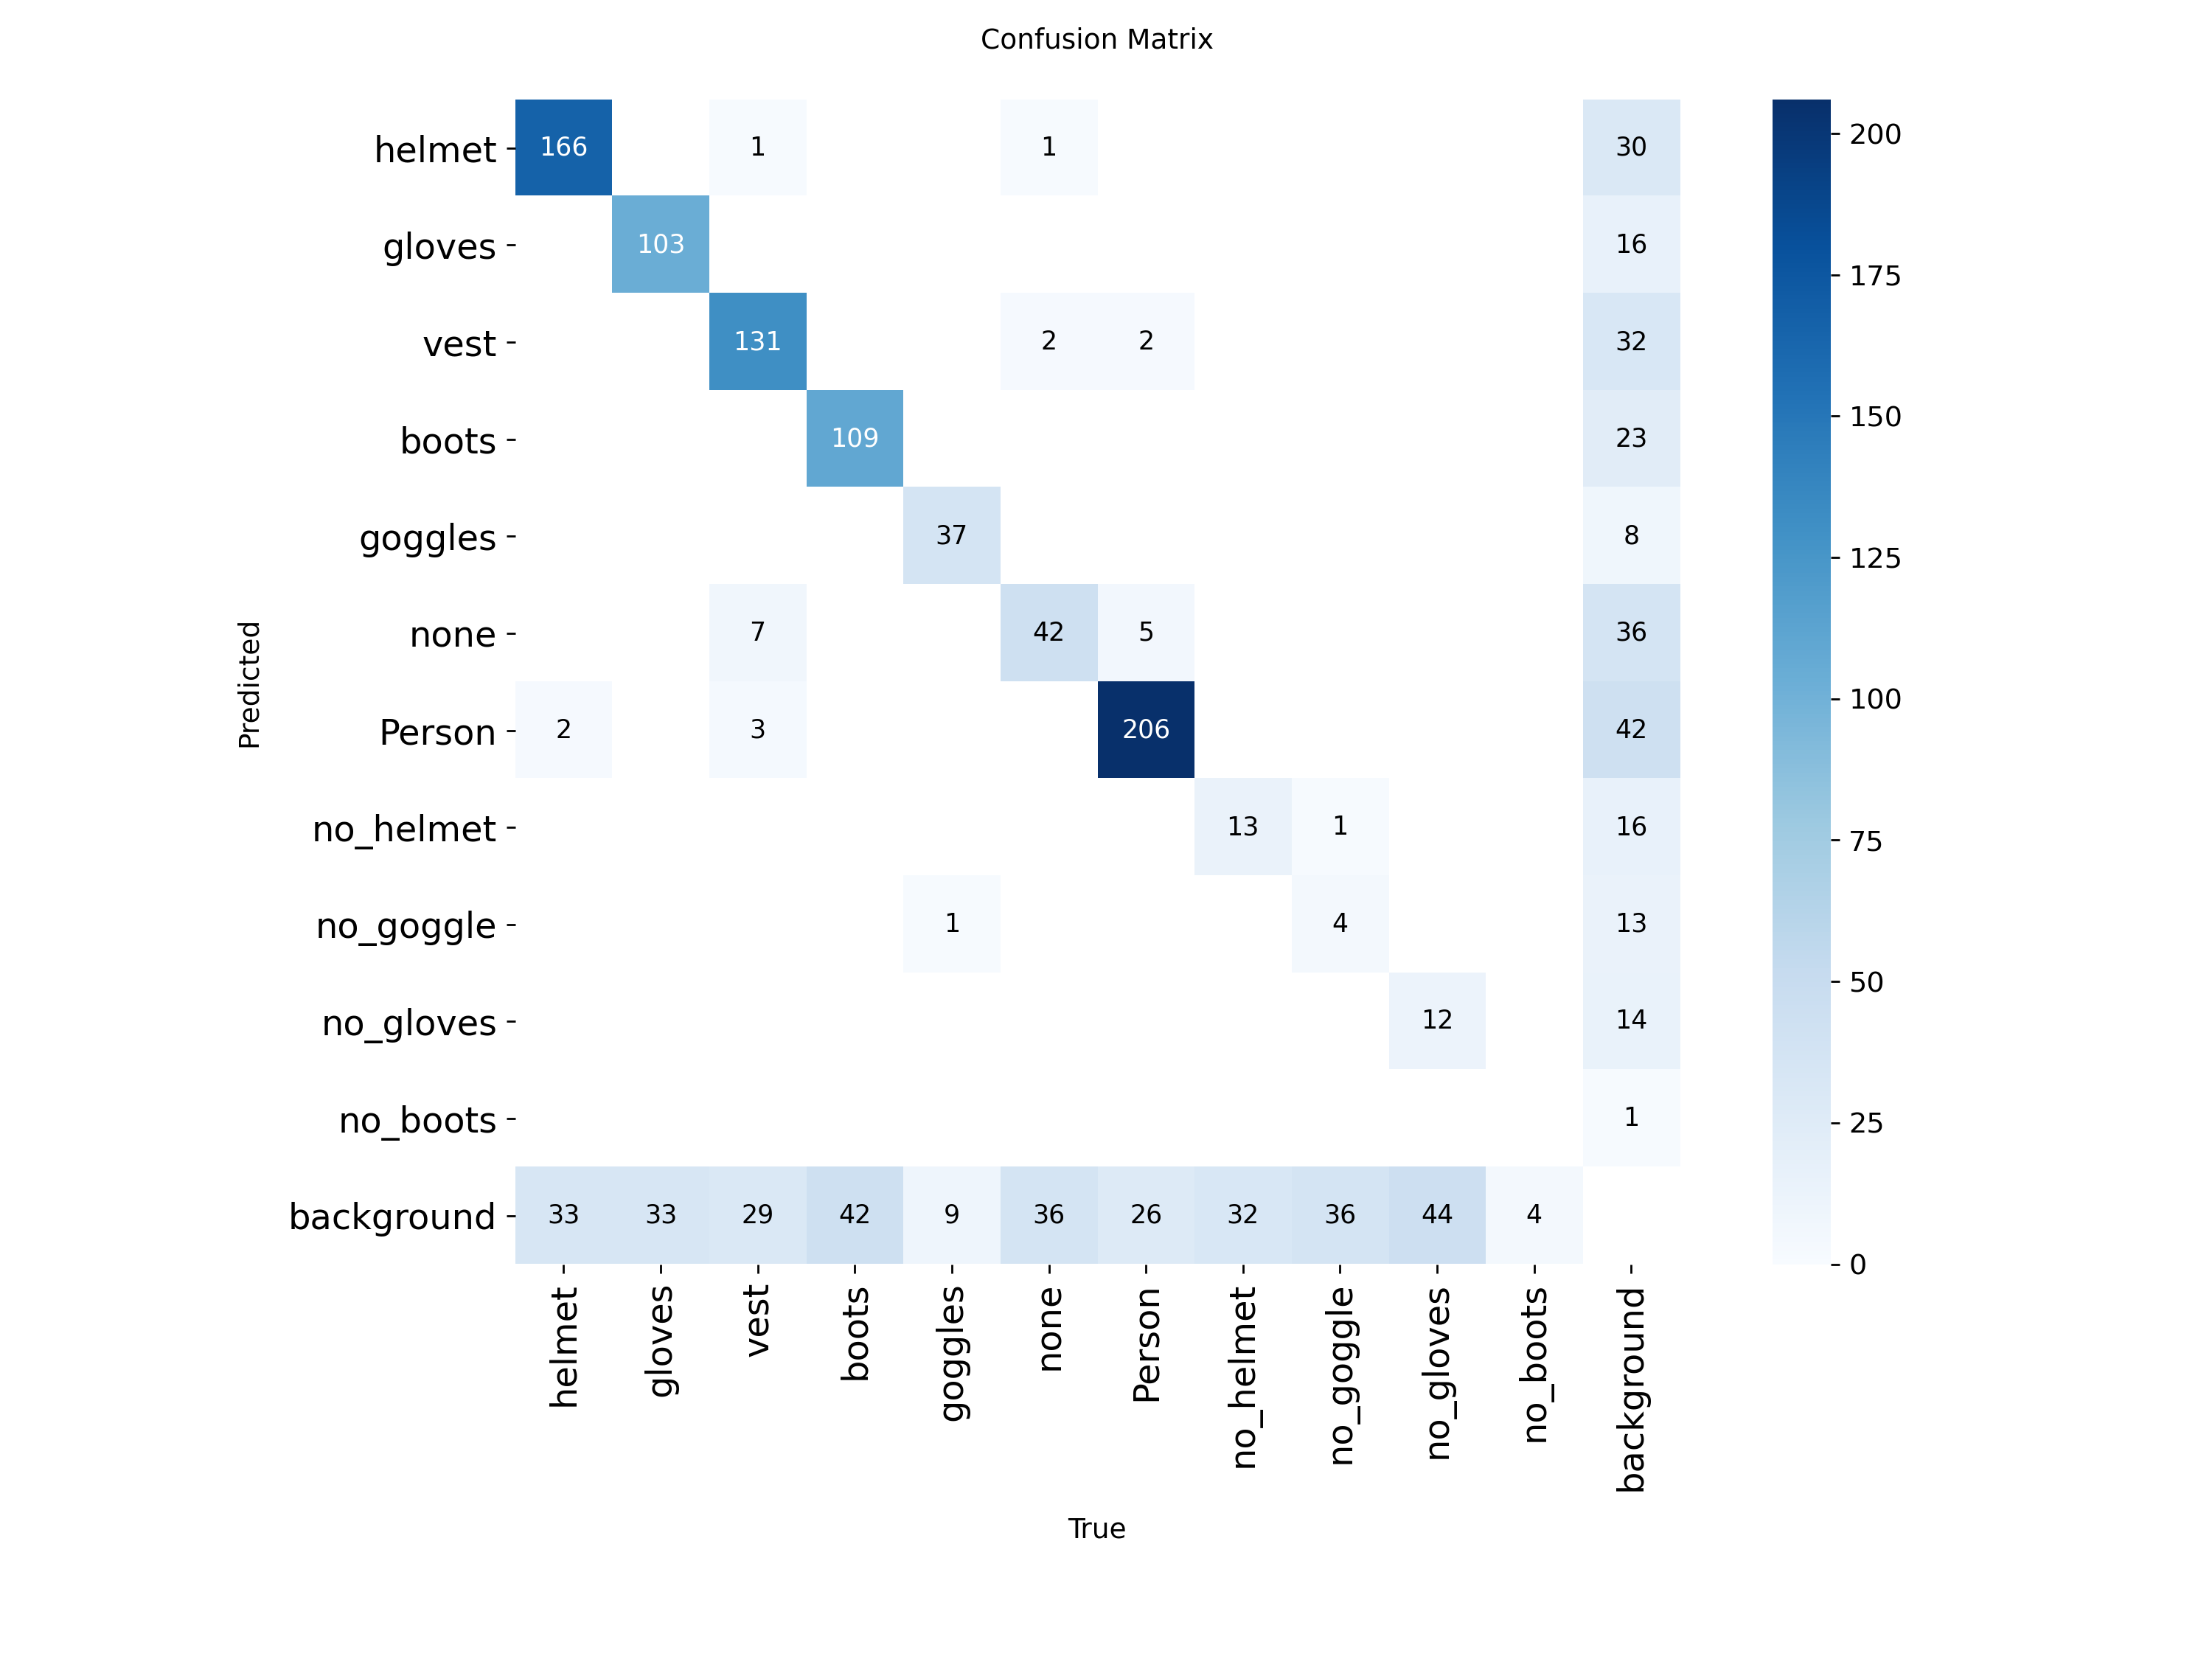

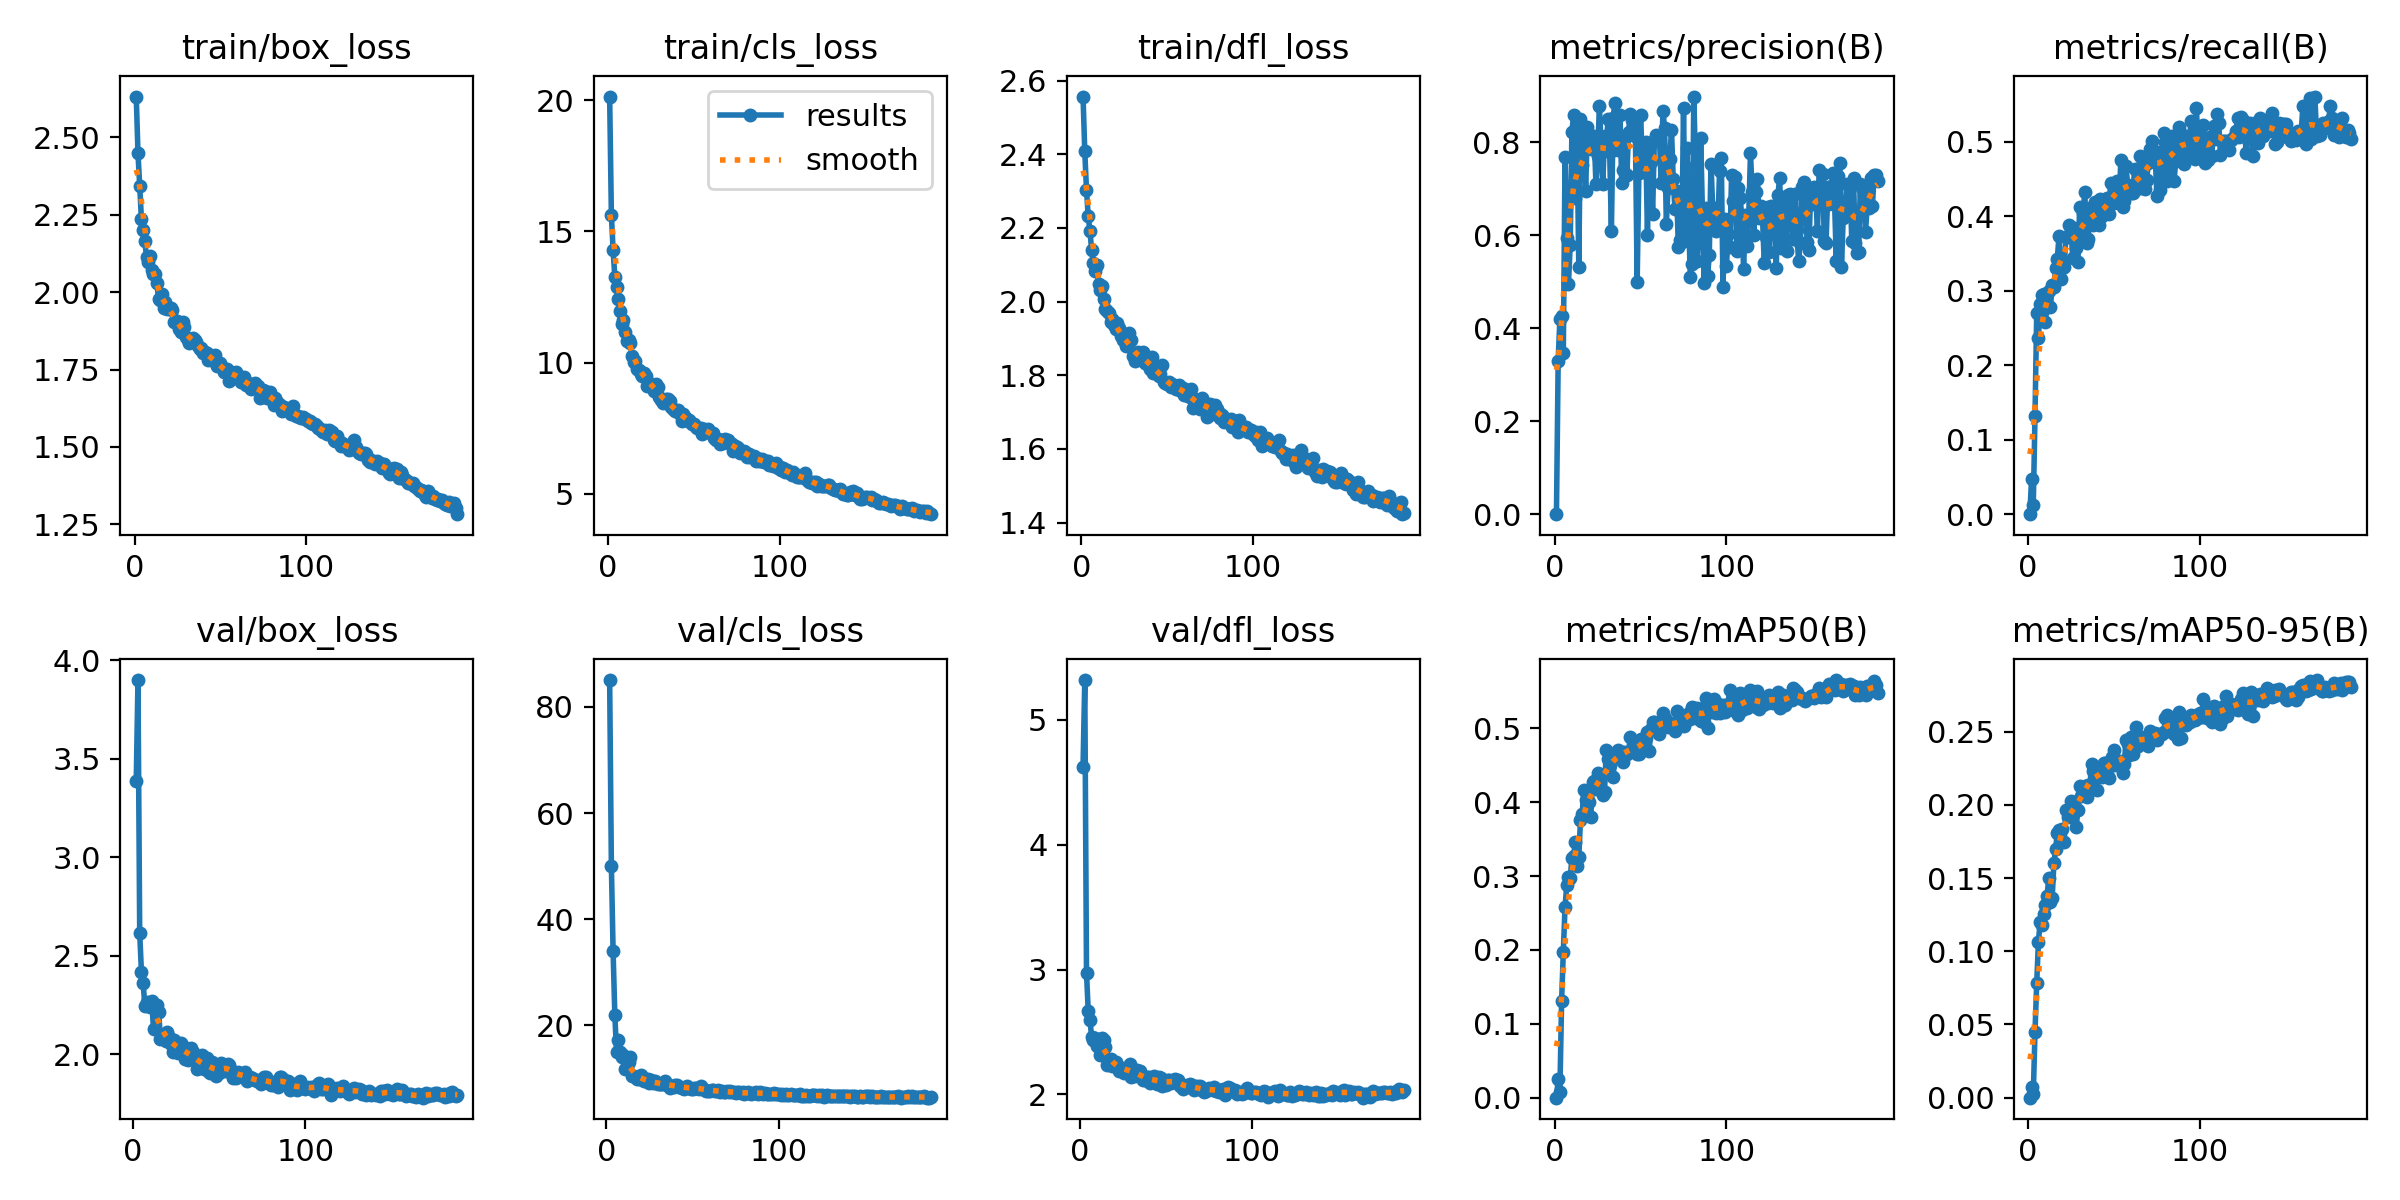

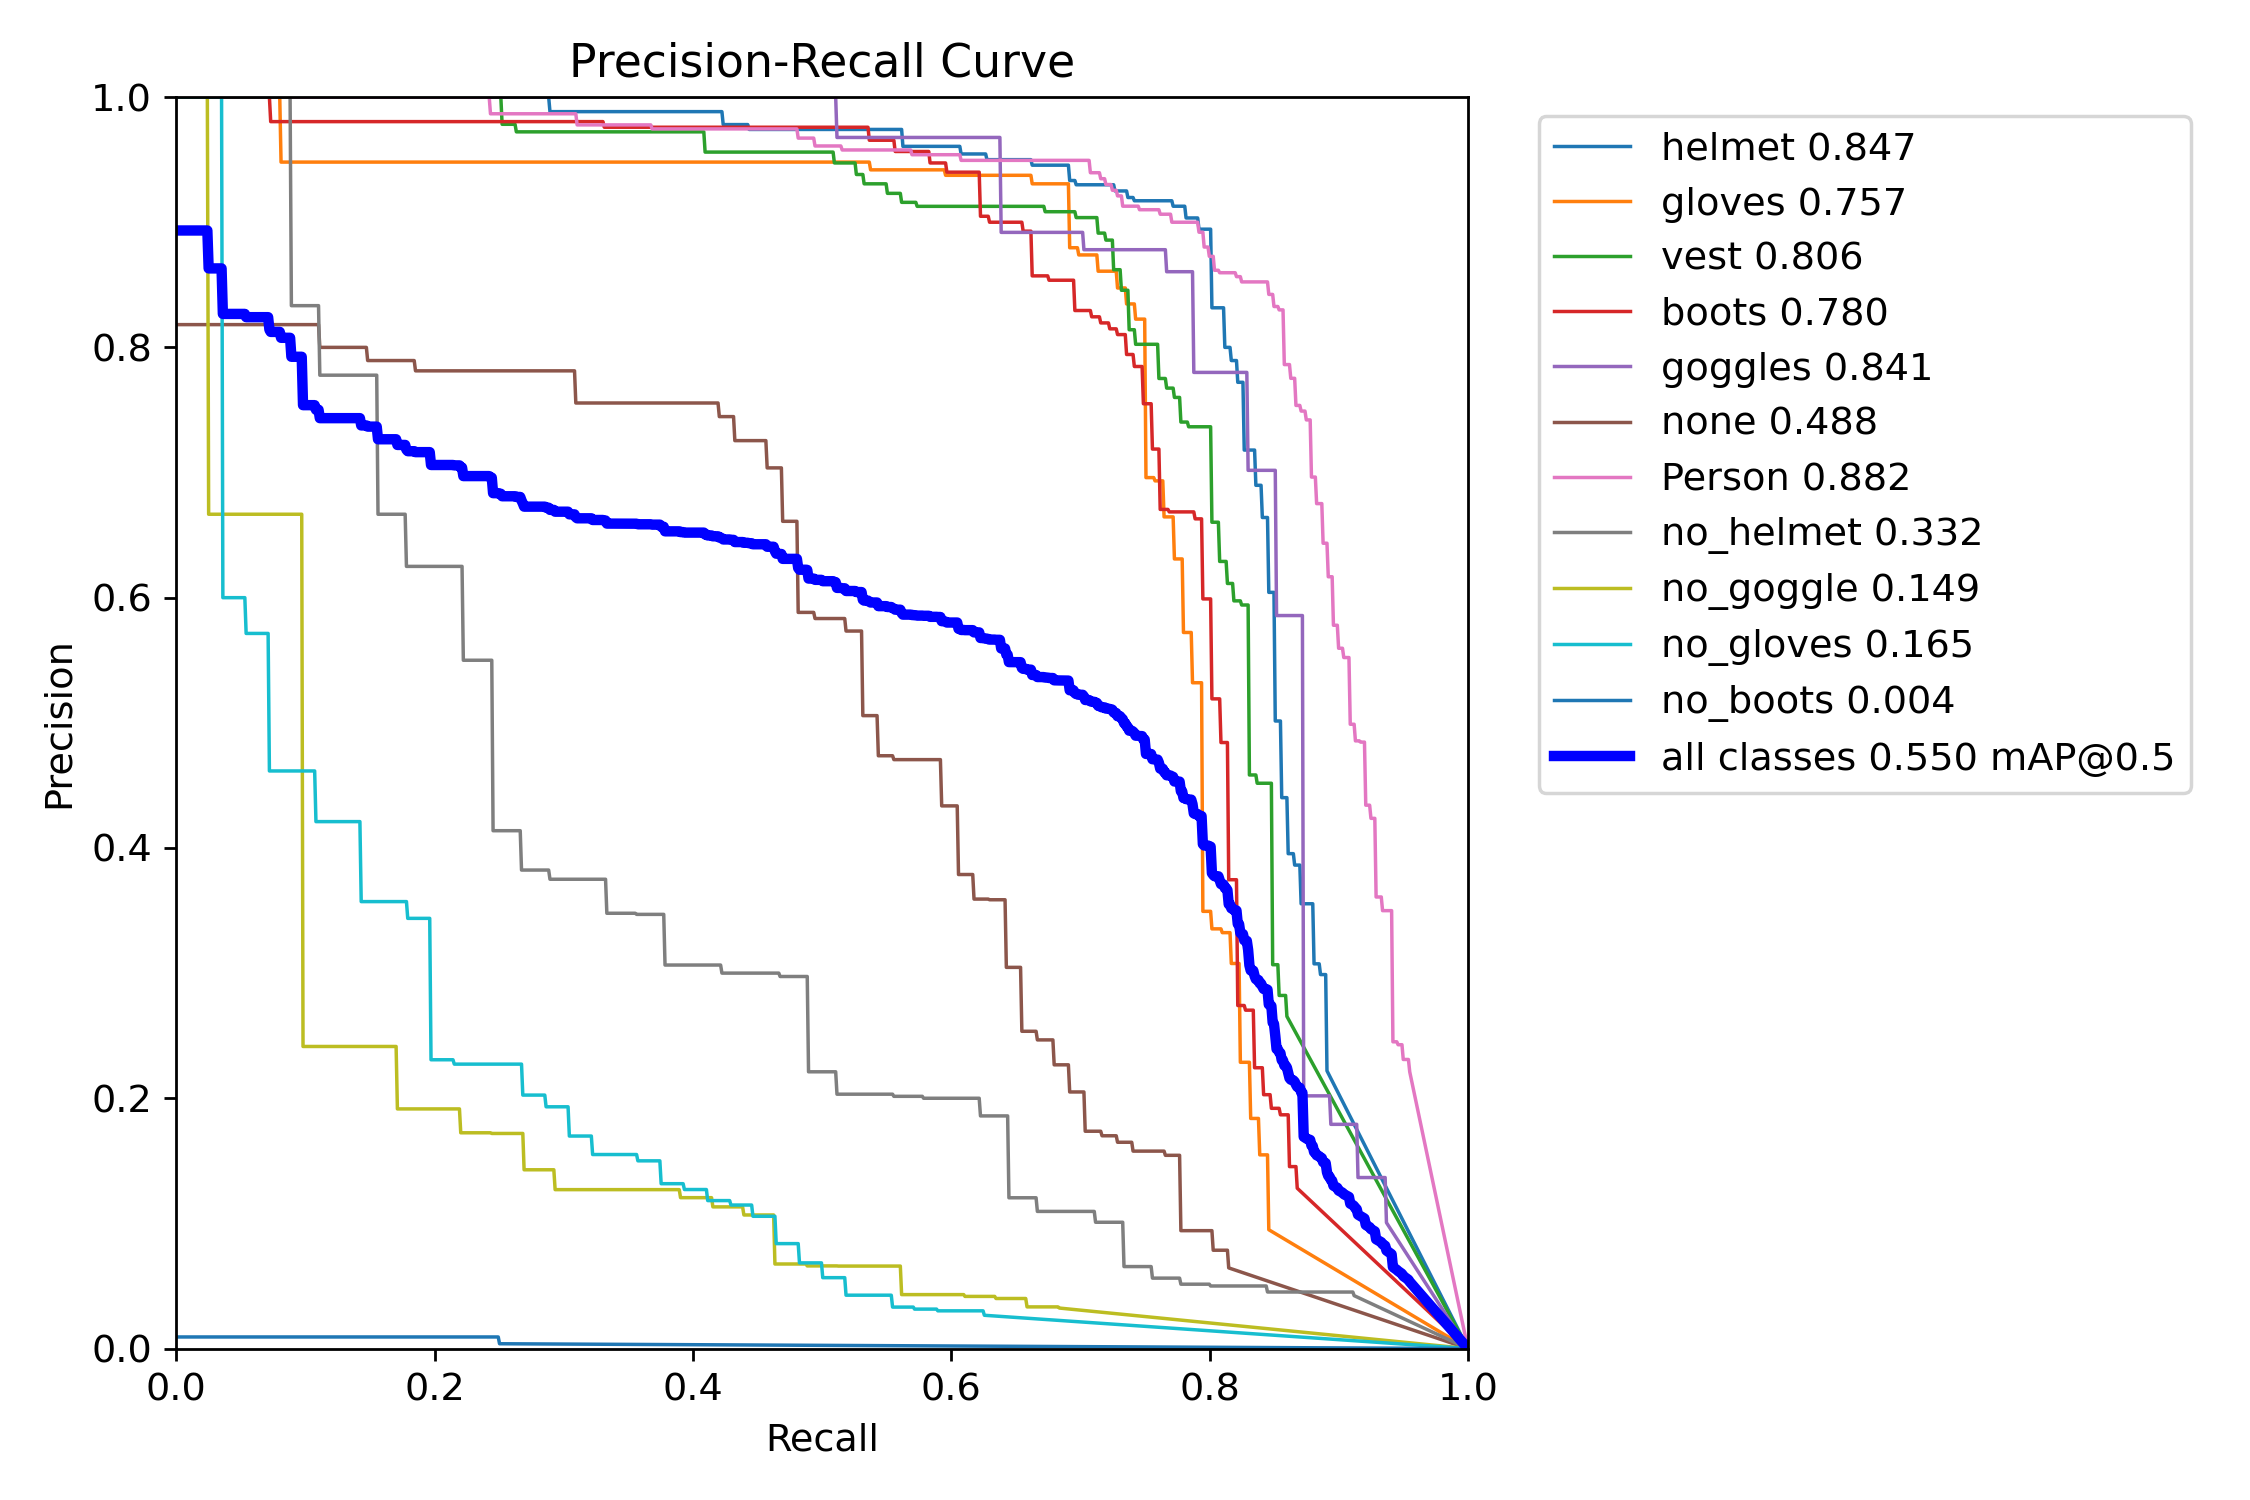

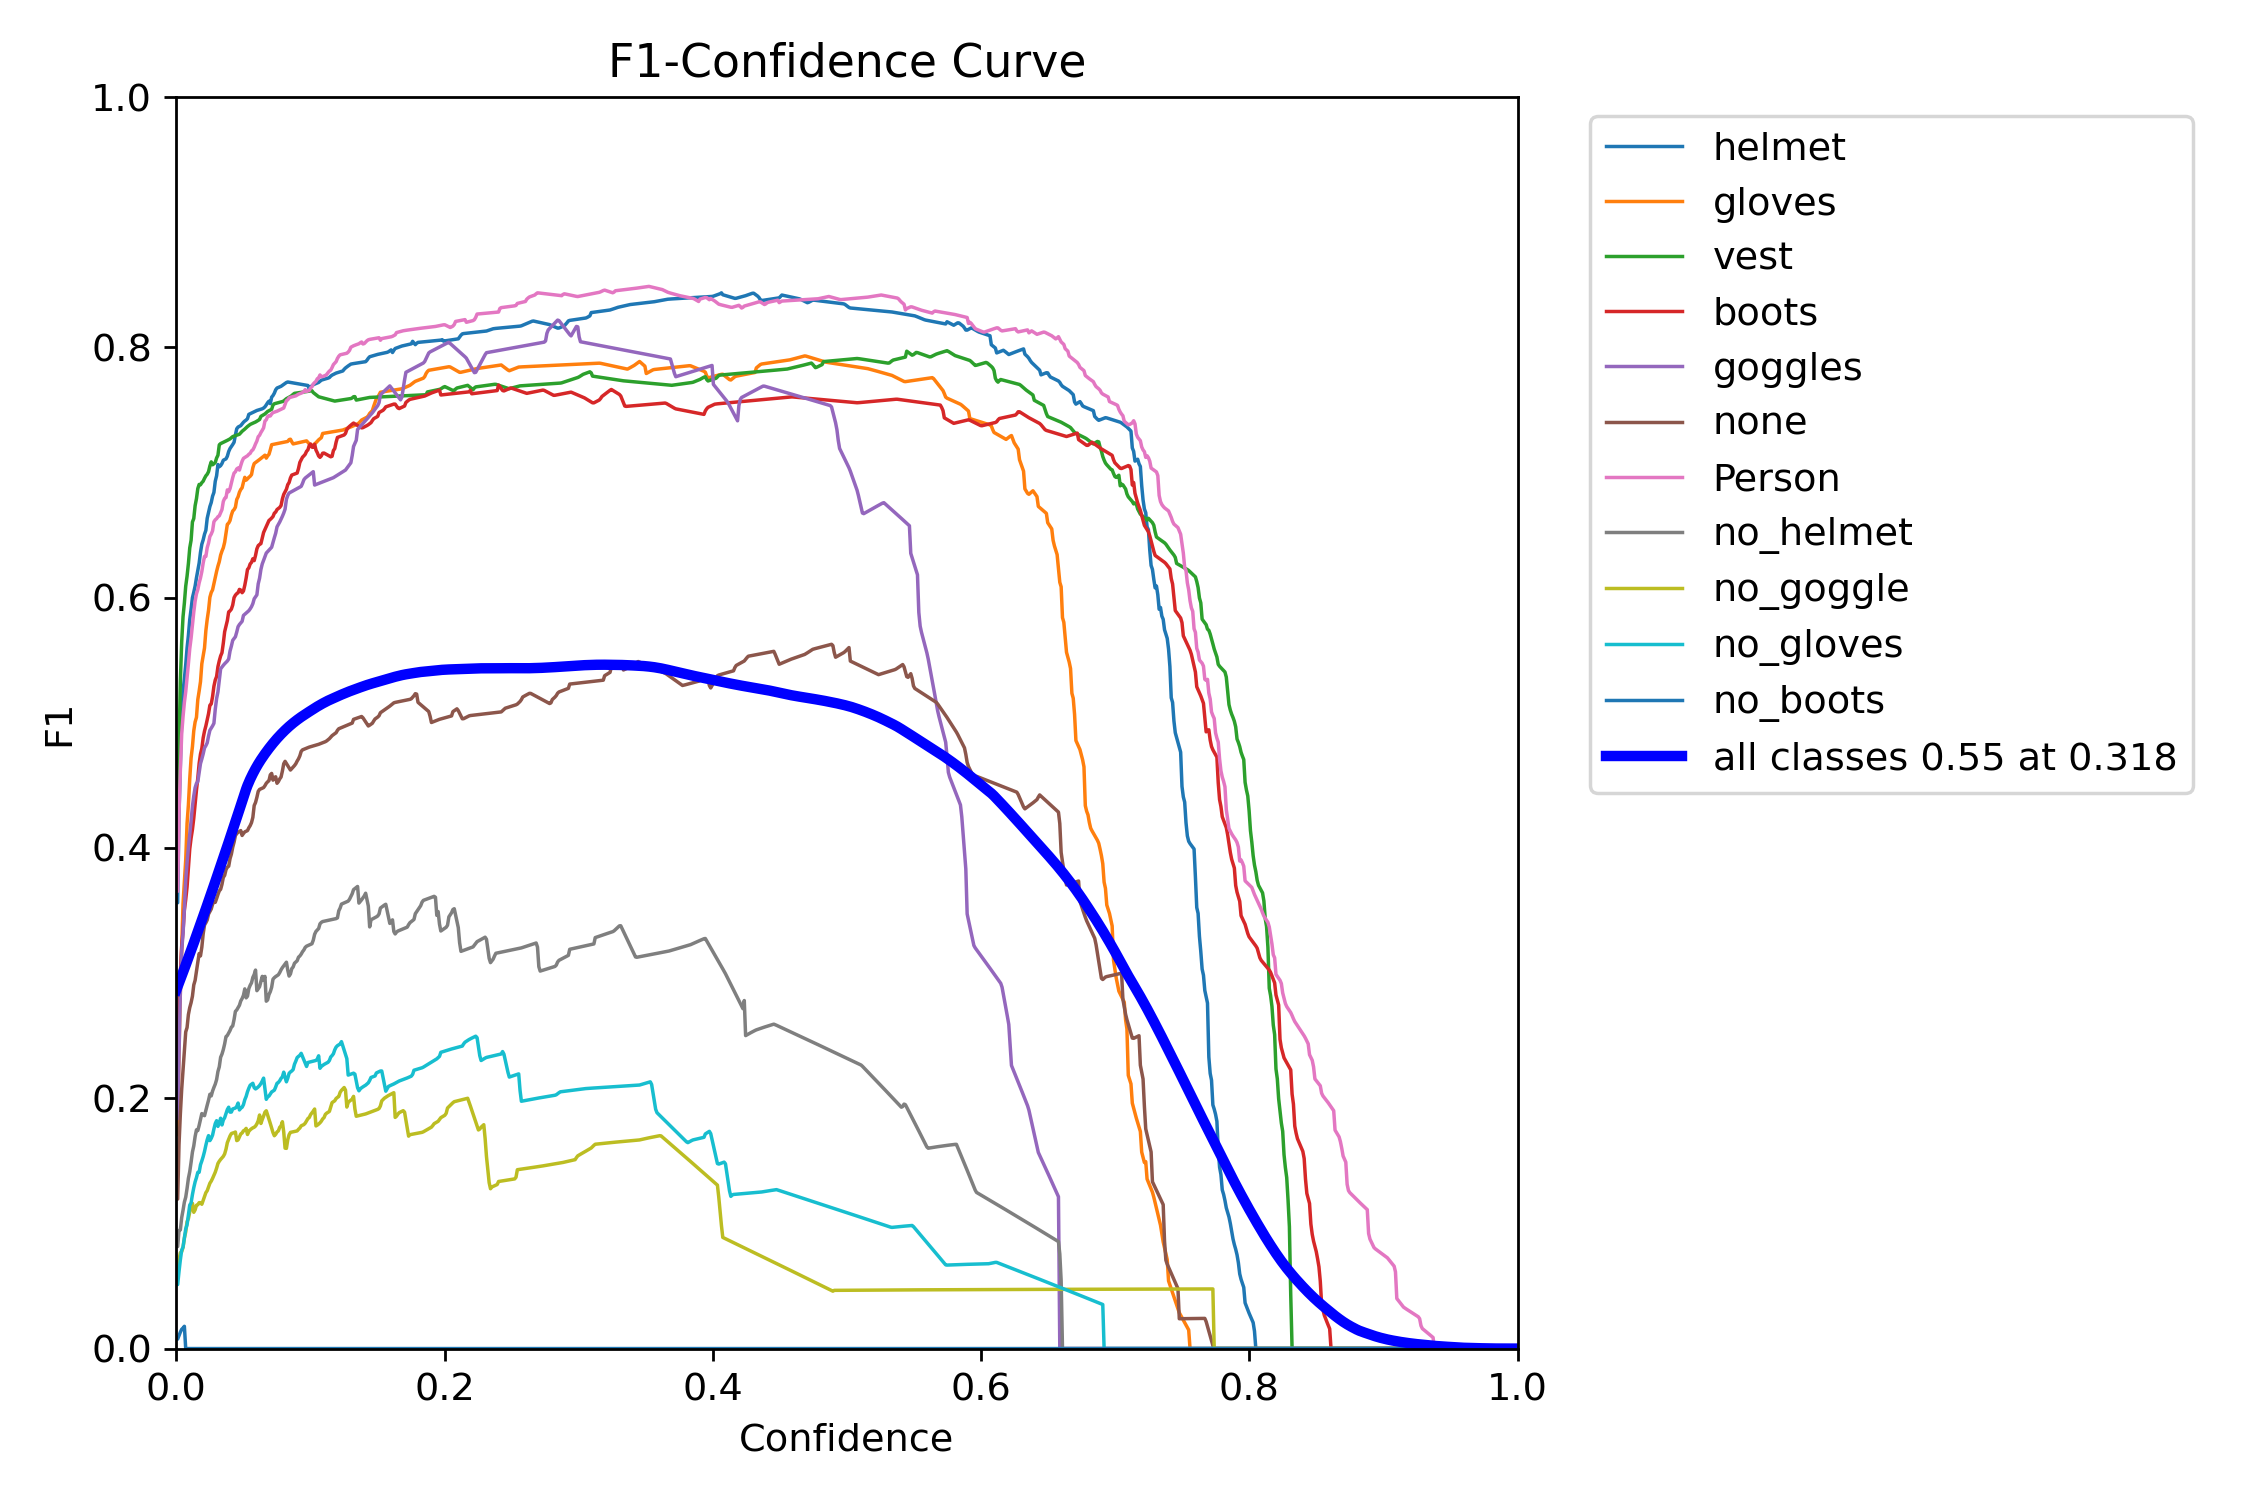

In [ ]:
# Plot training results
from IPython.display import Image, display

# Confusion matrix
display(Image(filename='/content/drive/MyDrive/PPE_Detection_Project/ppe_yolo11_exp1/confusion_matrix.png'))

# Training curves
display(Image(filename='/content/drive/MyDrive/PPE_Detection_Project/ppe_yolo11_exp1/results.png'))

# PR curve
display(Image(filename='/content/drive/MyDrive/PPE_Detection_Project/ppe_yolo11_exp1/BoxPR_curve.png'))

# F1 curve
display(Image(filename='/content/drive/MyDrive/PPE_Detection_Project/ppe_yolo11_exp1/BoxF1_curve.png'))


image 1/141 /content/datasets/construction-ppe/images/test/image1.jpeg: 640x640 1 helmet, 1 vest, 1 Person, 48.5ms
image 2/141 /content/datasets/construction-ppe/images/test/image10.jpeg: 640x640 3 vests, 2 bootss, 3 Persons, 47.5ms
image 3/141 /content/datasets/construction-ppe/images/test/image1003.jpg: 640x640 1 helmet, 2 glovess, 1 vest, 2 bootss, 1 goggles, 1 Person, 47.5ms
image 4/141 /content/datasets/construction-ppe/images/test/image1007.jpg: 640x640 1 helmet, 2 glovess, 1 vest, 3 bootss, 1 goggles, 1 Person, 43.4ms
image 5/141 /content/datasets/construction-ppe/images/test/image1009.jpg: 640x640 1 helmet, 1 gloves, 1 vest, 1 boots, 1 Person, 32.2ms
image 6/141 /content/datasets/construction-ppe/images/test/image1014.jpg: 640x640 1 helmet, 2 glovess, 1 vest, 2 bootss, 1 goggles, 1 Person, 31.4ms
image 7/141 /content/datasets/construction-ppe/images/test/image1019.jpg: 640x640 1 helmet, 2 glovess, 1 vest, 2 bootss, 1 goggles, 1 Person, 30.6ms
image 8/141 /content/datasets/cons

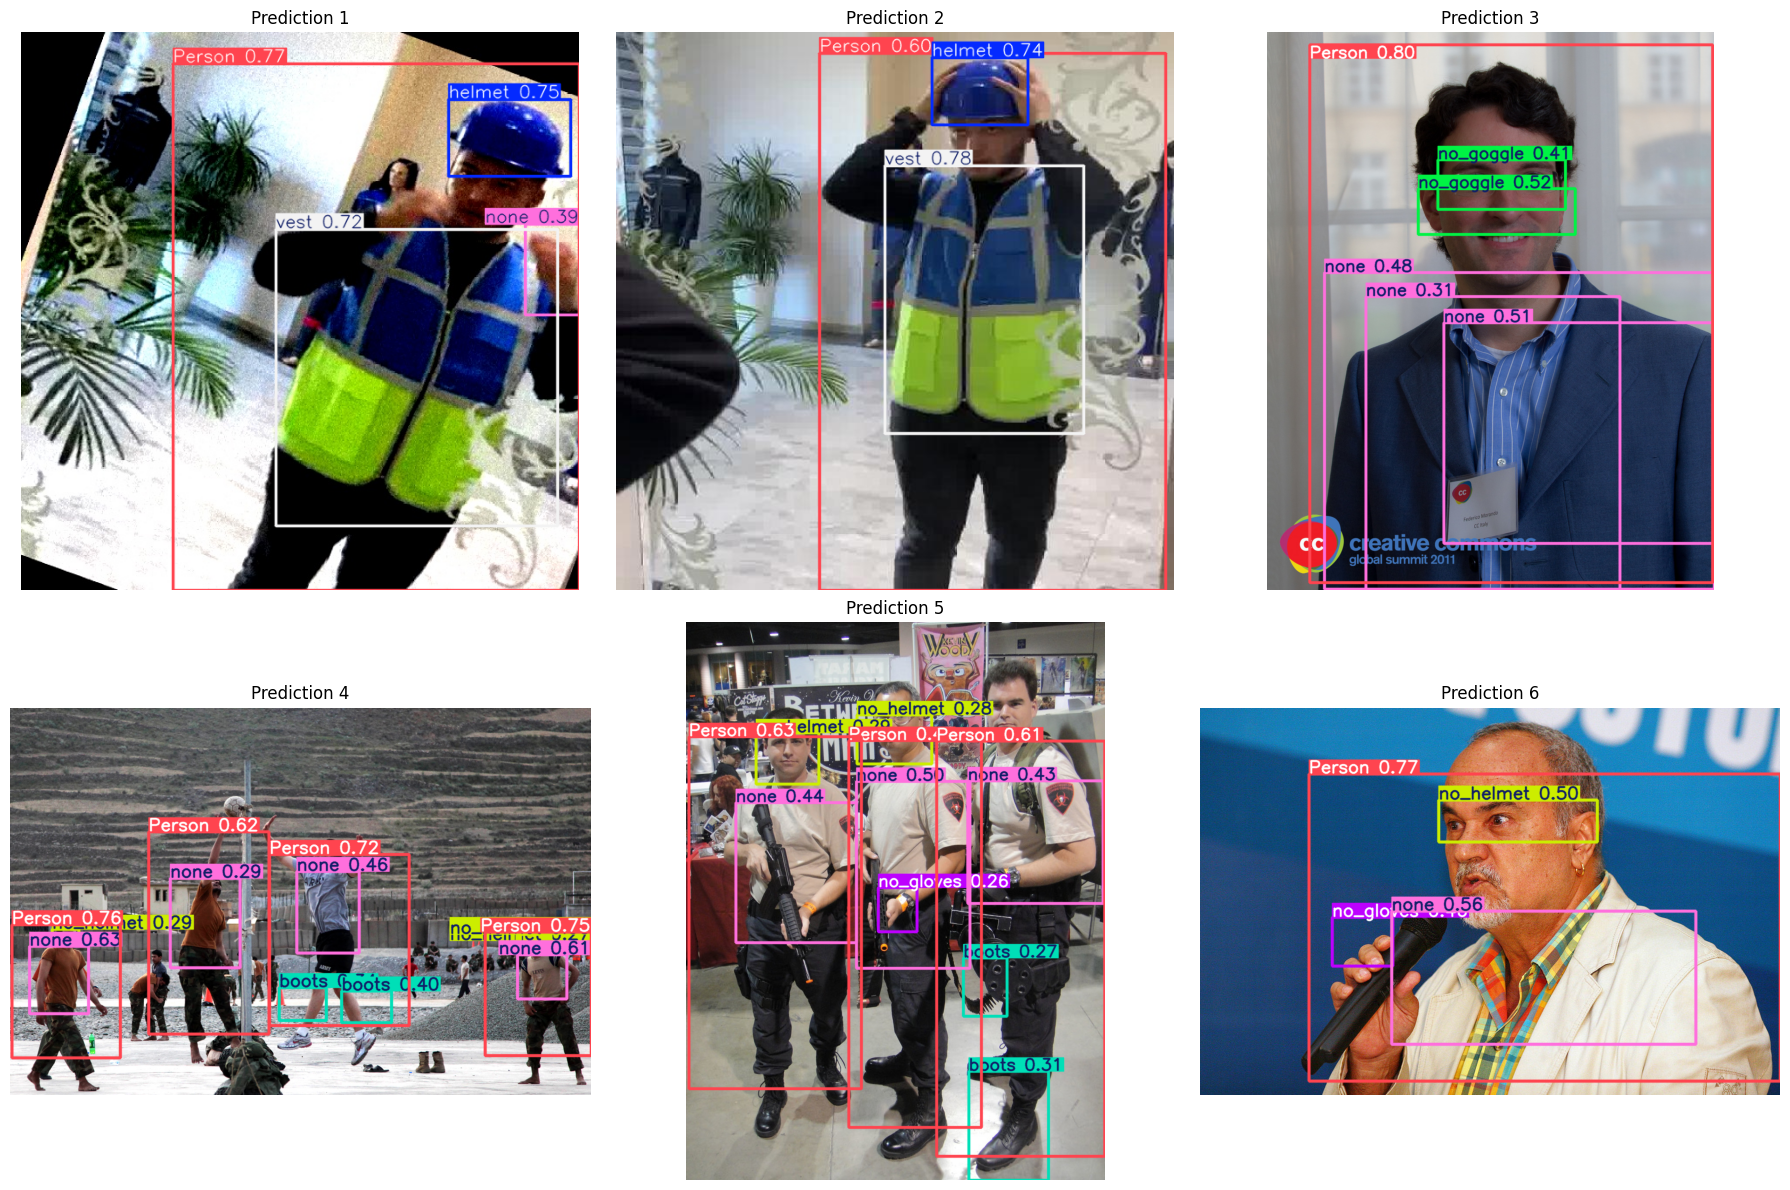

In [ ]:
# Predict on test images
test_results = best_model.predict(
    source='/content/datasets/construction-ppe/images/test',
    conf=0.25,
    iou=0.6,
    save=True,
    save_txt=True,
    save_conf=True,
    project='/content/drive/MyDrive/PPE_Detection_Project',
    name='test_predictions'
)

# Visualize predictions
import random

def show_predictions(results, num_samples=6):
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))

    sample_results = random.sample(results, min(num_samples, len(results)))

    for idx, result in enumerate(sample_results):
        row = idx // 3
        col = idx % 3

        img = result.plot()  # Draw boxes on image
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        axes[row, col].imshow(img)
        axes[row, col].set_title(f'Prediction {idx+1}')
        axes[row, col].axis('off')

    plt.tight_layout()
    plt.show()

show_predictions(test_results)

In [ ]:
# Per-class metrics
print("\nPer-Class Performance:")
print("-" * 50)

for idx, class_name in enumerate(data_config['names']):
    class_map = validation_results.box.maps[idx]
    print(f"{class_name:20s}: mAP50 = {class_map:.4f}")


Per-Class Performance:
--------------------------------------------------
helmet              : mAP50 = 0.5072
gloves              : mAP50 = 0.4341
vest                : mAP50 = 0.5760
boots               : mAP50 = 0.5089
goggles             : mAP50 = 0.4459
none                : mAP50 = 0.2460
Person              : mAP50 = 0.5550
no_helmet           : mAP50 = 0.1156
no_goggle           : mAP50 = 0.0930
no_gloves           : mAP50 = 0.0814
no_boots            : mAP50 = 0.0000


# **FASE 7: DEPLOYMENT**

In [ ]:
# Export to different formats
# ONNX for general deployment
best_model.export(format='onnx', imgsz=640, simplify=True)

# TensorRT for NVIDIA GPUs
# best_model.export(format='engine', imgsz=640, half=True)

# CoreML for iOS
# best_model.export(format='coreml', imgsz=640)

# TFLite for mobile/edge
# best_model.export(format='tflite', imgsz=640, int8=True)

Ultralytics 8.3.229 🚀 Python-3.12.12 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
💡 ProTip: Export to OpenVINO format for best performance on Intel hardware. Learn more at https://docs.ultralytics.com/integrations/openvino/

PyTorch: starting from '/content/drive/MyDrive/PPE_Detection_Project/ppe_yolo11_exp1/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 15, 8400) (48.9 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0,<=1.19.1', 'onnxslim>=0.1.71', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
Using Python 3.12.12 environment at: /usr
Resolved 14 packages in 142ms
Prepared 6 packages in 7.32s
Installed 6 packages in 265ms
 + colorama==0.4.6
 + coloredlogs==15.0.1
 + humanfriendly==10.0
 + onnx==1.19.1
 + onnxruntime-gpu==1.23.2
 + onnxslim==0.1.74

requirements: AutoUpdate success ✅ 9.1s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.19.1 opset 22...
ONNX: sl

'/content/drive/MyDrive/PPE_Detection_Project/ppe_yolo11_exp1/weights/best.onnx'

WARNING ⚠️ Unable to automatically guess model task, assuming 'task=detect'. Explicitly define task for your model, i.e. 'task=detect', 'segment', 'classify','pose' or 'obb'.
Predicting on sample image: /content/datasets/construction-ppe/images/test/image150.jpg
Loading /content/drive/MyDrive/PPE_Detection_Project/ppe_yolo11_exp1/weights/best.onnx for ONNX Runtime inference...
requirements: Ultralytics requirements ['onnx', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
Using Python 3.12.12 environment at: /usr
Resolved 12 packages in 190ms
Prepared 4 packages in 4.24s
Installed 4 packages in 392ms
 + coloredlogs==15.0.1
 + humanfriendly==10.0
 + onnx==1.20.0rc1
 + onnxruntime-gpu==1.23.2

requirements: AutoUpdate success ✅ 5.5s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect

Using ONNX Runtime 1.23.2 ('CUDAExecutionProvider', {'device_id': 0})

image 1/1 /content/datasets/construction-ppe/images/test/image150.jpg: 640x640 2 helmets, 3 glov

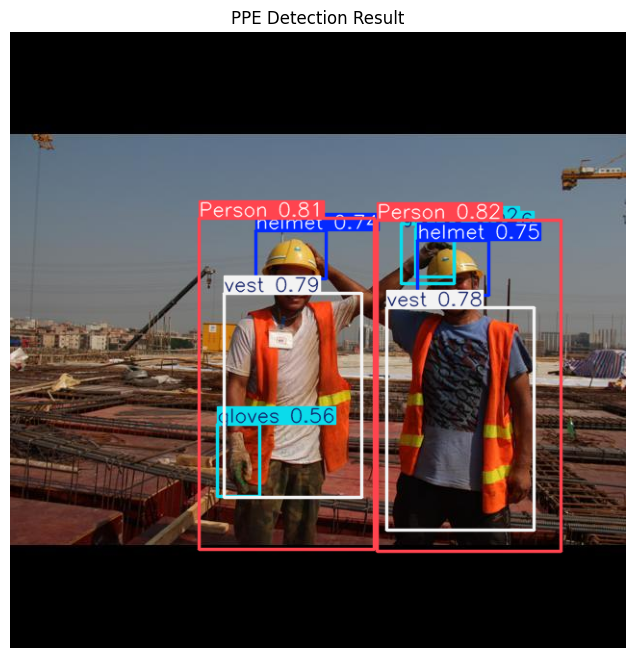

In [5]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
from pathlib import Path
import random

# Load ONNX model
model = YOLO("/content/drive/MyDrive/PPE_Detection_Project/ppe_yolo11_exp1/weights/best.onnx")  # pastikan file ini ada di folder project

# --- New code to predict on a sample test image ---

# Get a list of test images
test_image_dir = Path('/content/datasets/construction-ppe/images/test')
image_files = list(test_image_dir.glob('*.jpg')) + list(test_image_dir.glob('*.jpeg')) + list(test_image_dir.glob('*.png'))

if image_files:
    # Select a random image from the test set
    random_image_path = random.choice(image_files)
    print(f"Predicting on sample image: {random_image_path}")

    # Run inference on the image
    results = model(str(random_image_path))

    # Display the result
    for r in results:
        im_bgr = r.plot()  # plot predictions on the image
        im_rgb = cv2.cvtColor(im_bgr, cv2.COLOR_BGR2RGB) # Convert BGR to RGB for matplotlib

        plt.figure(figsize=(10, 8))
        plt.imshow(im_rgb)
        plt.axis('off')
        plt.title('PPE Detection Result')
        plt.show()
else:
    print(f"No image files found in {test_image_dir} to perform prediction.")

# --- End of new code ---

# The camera access code has been removed as it's not feasible in Colab
# cap = cv2.VideoCapture(0)
# cap.set(3, 640)
# cap.set(4, 480)
# while True:
#     ret, frame = cap.read()
#     if not ret:
#         print("Tidak dapat mengakses kamera!")
#         break
#     results = model(frame)
#     annotated = results[0].plot()
#     cv2.imshow("PPE Detection - ONNX Camera", annotated)
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break
# cap.release()
# cv2.destroyAllWindows()